In [1]:
!uv add pymupdf

Resolved 174 packages in 32ms
Audited 152 packages in 0.88ms


In [2]:
import pymupdf

doc = pymupdf.open(r"C:\Users\alexe\Downloads\books\math-engineers.pdf")

In [3]:
len(doc)

442

In [4]:
page100 = doc[100]

In [7]:
print(page100.get_text())

ADDITIONAL  RULES  OF  DIFFERENTIATION        83 
If  z  is  a  function  of  x  and  y,  i.  e.,  z  —  f(x,  y),  the  total  differential 
dz  is  obtained  from  the  partial  differentials  dx  and  dy  by  the  use 
of  the  following  rule — 
fdz 
dy 
dy. 
The  reason  for  this  is  more  clearly  seen  if  we  work  from  the 
fundamental  idea  of  rates  of  change,  and  introduce  the  actually 
measurable  quantities  like  Sz,  Sx  and  Sy. 
FIG.  21. 
Thus — 
or  total  change  in  z  =  change  in  z  due  to  the  change  in 
change  in  z  due  to  the  change  in  y. 
The  change  in  z  due  to  the  change  in  x  must  be  measured  by 
the  product  of  the  change  in  x  multiplied  by  the  rate  at  which  z 
is  changing  with  regard  to  x ;  and  this  fact  can  be  better  illustrated 
by  reference  to  a  diagram  (Fig.  21). 
Let  P  be  a  point  (x,  y,  z)  on  a  surface,  and  let  P  move  to  a  new 
position  Q  near  to  P.  The  change  of

In [12]:
!uv add pillow

Resolved 174 packages in 2ms
Audited 152 packages in 0.09ms


In [18]:
matrix = pymupdf.Matrix(1.5, 1.5)

pixmap = page100.get_pixmap(matrix=matrix)
png_bytes = pixmap.tobytes(output='png')

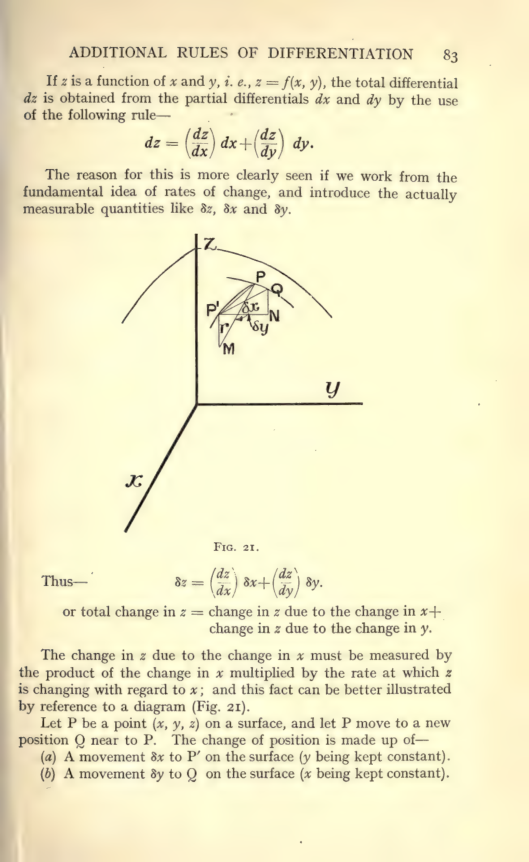

In [19]:
from PIL import Image
import io

img = Image.open(io.BytesIO(png_bytes))
img

In [24]:
import base64

b64 = base64.b64encode(png_bytes).decode("utf-8")
image_url = f"data:image/jpeg;base64,{b64}"

In [23]:
from openai import OpenAI
openai_client = OpenAI()

In [27]:
instructions = """
extract text from this image verbatim

for equations, use latex, $ for inline, and $$ for blocks 
""".strip()

messages = [
    {"role": "system", "content": instructions}, 
    {
        "role": "user",
        "content": [
            {
                "type": "input_image",
                "image_url": image_url,
            },
        ],
    }
]

response = openai_client.responses.create(
    model="gpt-4o-mini",
    input=messages,
)

In [28]:
print(response.output_text)

```
ADDITIONAL RULES OF DIFFERENTIATION 83

If z is a function of x and y, i.e., z = f(x, y), the total differential dz is obtained from the partial differentials dx and dy by the use of the following rule—

$$
dz = \left( \frac{dz}{dx} \right) dx + \left( \frac{dz}{dy} \right) dy.
$$

The reason for this is more clearly seen if we work from the fundamental idea of rates of change, and introduce the actually measurable quantities like dz, dx and dy.

\begin{center}
\includegraphics{diagram} 
\end{center}

Thus—

$$
dz = \left( \frac{dz}{dx} \right) dx + \left( \frac{dz}{dy} \right) dy.
$$

or total change in z = change in z due to the change in x+.

change in z due to the change in y.

The change in z due to the change in x must be measured by the product of the change in x multiplied by the rate at which z is changing with regard to x; and this fact can be better illustrated by reference to a diagram (Fig. 21).

Let P be a point (x, y, z) on a surface, and let P move to a new position

In [29]:
MODEL_PRICES = {
    "gpt-4o-mini": {"input": 0.15, "output": 0.60},
    "gpt-5-nano": {"input": 0.075, "output": 0.30},
    "gpt-5-mini": {"input": 0.25, "output": 2.00},
    "gpt-5.2": {"input": 1.75, "output": 14.00},
    "gpt-5.2-pro": {"input": 21.00, "output": 168.00},
}

def calculate_cost(model_name: str, input_tokens: int, output_tokens: int) -> float:
    prices = MODEL_PRICES[model_name.lower()]
    input_cost = (input_tokens / 1_000_000) * prices["input"]
    output_cost = (output_tokens / 1_000_000) * prices["output"]
    return input_cost + output_cost

In [31]:
calculate_cost(
    model_name='gpt-4o-mini',
    input_tokens=response.usage.input_tokens,
    output_tokens=response.usage.output_tokens,
)

0.004030649999999999

In [34]:
len(doc) * 0.005

2.21

In [39]:
instructions = """
extract text from this image verbatim

for equations, use latex, $ for inline, and $$ for blocks

important: don't skip any text. if something is not possible to 
recognize, include a placeholder
""".strip()

messages = [
    {"role": "system", "content": instructions}, 
    {
        "role": "user",
        "content": [
            {
                "type": "input_image",
                "image_url": image_url,
                "detail": "low"
            },
        ],
    }
]

response = openai_client.responses.create(
    model="gpt-4o-mini",
    input=messages,
)

In [40]:
calculate_cost(
    model_name='gpt-4o-mini',
    input_tokens=response.usage.input_tokens,
    output_tokens=response.usage.output_tokens,
)

0.0006083999999999999

In [41]:
print(response.output_text)

```
ADDITIONAL RULES OF DIFFERENTIATION

If $z$ is a function of $x$ and $y$, i.e., $z = f(x, y)$, the total differential $dz$ is obtained from the partial differentials $dx$ and $dy$ by the use of the following relation:

$$dz = \frac{dz}{dx}dx + \frac{dz}{dy}dy$$

The reason for this is more clearly seen if we work from the fundamental idea of $x$, $y$, and introduce the actually measurable quantities like $x$, $y$, and $z$.

Thus—

$$\text{or total change in } z = \text{change in } z \text{ due to change in } x.$$

The change in $z$ due to a change in $x$ can be measured by the product of the change in $x$ multiplied by the rate at which $z$ is changing with regard to $x$; and that fact can be better illustrated by referring to a diagram (Fig. 21).

Let $P$ be a point $(x, y)$ on a surface, and let $P$ move to a new position $Q$ near to $P$. The change of position is noted by $dx$ and $dy$. The change at point $Q$ on the surface (by keeping $z$ constant).
```


In [54]:
from pydantic import BaseModel, Field
from typing import Literal, Union


class PageBlock(BaseModel):
    type: str = Field(..., description="Discriminator that identifies which kind of page block this is.")


class SectionHeadingBlock(PageBlock):
    type: Literal["section_heading"] = "section_heading"
    title: str = Field(..., description="The section heading text.")


class TextBlock(PageBlock):
    type: Literal["text"] = "text"
    text: str = Field(..., description="Explanatory prose from the textbook.")


class EquationBlock(PageBlock):
    """
    A mathematical expression written in LaTeX.
    """
    type: Literal["equation"] = "equation"
    latex: str = Field(..., description="The equation in LaTeX format.")
    description: str | None = Field(
        None,
        description="Optional plain-language meaning or interpretation of the equation."
    )


class FigureBlock(PageBlock):
    type: Literal["figure"] = "figure"
    caption: str | None = Field(None, description="Figure caption or label, if present.")
    description: str = Field(
        ...,
        description="Conceptual description of what the figure shows and why it matters."
    )
    figure_number: int = Field(
        ...,
        description="Figure number as mentioned in the book."
    )


class TableBlock(PageBlock):
    type: Literal["table"] = "table"
    caption: str | None = Field(None, description="Table caption or label, if present.")
    columns: list[str] = Field(..., description="Column headers in reading order.")
    rows: list[list[str]] = Field(..., description="Table rows aligned with columns.")


PageBlockUnion = Union[
    SectionHeadingBlock,
    TextBlock,
    EquationBlock,
    FigureBlock,
    TableBlock,
]


class Page(BaseModel):
    page_number: int = Field(..., description="Printed page number in the textbook.")
    header: str | None = Field(None, description="Running page header text, if any.")
    blocks: list[PageBlockUnion] = Field(
        ...,
        description="Ordered list of extracted page blocks."
    )

In [55]:
Page.model_json_schema()

{'$defs': {'EquationBlock': {'description': 'A mathematical expression written in LaTeX.',
   'properties': {'type': {'const': 'equation',
     'default': 'equation',
     'title': 'Type',
     'type': 'string'},
    'latex': {'description': 'The equation in LaTeX format.',
     'title': 'Latex',
     'type': 'string'},
    'description': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'description': 'Optional plain-language meaning or interpretation of the equation.',
     'title': 'Description'}},
   'required': ['latex'],
   'title': 'EquationBlock',
   'type': 'object'},
  'FigureBlock': {'properties': {'type': {'const': 'figure',
     'default': 'figure',
     'title': 'Type',
     'type': 'string'},
    'caption': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'description': 'Figure caption or label, if present.',
     'title': 'Caption'},
    'description': {'description': 'Conceptual description of what the figure shows

In [77]:
instructions = """
You are extracting a textbook page into structured page blocks.

text and formulas should be extracted verbatim.

use latex for all math.
Use "$" for inline equation and EquationBlock type for block equations.

some inline equations should be treated as block equations
if there's little text around them.

important: don't skip any text. if something is not possible to 
recognize, include a placeholder

Extraction rules:
1) Preserve reading order. The blocks list must match the order a human reads the page.
2) Do NOT include OCR or layout details (no coordinates, fonts, line breaks, or scan artifacts).
3) Prefer fewer, larger TextBlocks over many tiny ones. Group adjacent paragraphs when they belong together.
4) Use LaTeX for all math in EquationBlock.latex.
5) Section headings must be SectionHeadingBlock only; do not include body text in them.
6) FigureBlock.description should explain what the figure conveys conceptually (graphs, curves, relationships),
   not how it looks on the page.
7) TableBlock should capture semantic columns and rows. Include units in column names if shown.
8) Store the running page header (if any) in Page.header.
9) If uncertain, make a best-faith concise extraction; do not invent content.
""".strip()

messages = [
    {"role": "system", "content": instructions}, 
    {
        "role": "user",
        "content": [
            {
                "type": "input_image",
                "image_url": image_url,
                "detail": "low"
            },
        ],
    }
]


response = openai_client.responses.parse(
    model="gpt-4o-mini",
    input=messages,
    text_format=Page
)

cost = calculate_cost(
    model_name='gpt-4o-mini',
    input_tokens=response.usage.input_tokens,
    output_tokens=response.usage.output_tokens,
)

print('cost=', cost)

cost= 0.0008116499999999999


In [78]:
page = response.output_parsed

In [79]:
class Page(BaseModel):
    page_number: int = Field(..., description="Printed page number in the textbook.")
    header: str | None = Field(None, description="Running page header text, if any.")
    blocks: list[PageBlockUnion] = Field(
        ...,
        description="Ordered list of extracted page blocks."
    )

    def print(self):
        print(self.page_number)
        print(self.header)

        for block in self.blocks:
            if block.type == 'text':
                print(block.text)
        
            elif block.type == 'equation':
                print(f'$${block.latex}$$')
        
            elif block.type == 'figure':
                # print(block)
                print(block.caption)
                print(block.description)
                print('Fig.', block.figure_number)
        
            else:
                print(block)
        
            print()

In [84]:
model_name = "gpt-5-mini"
# model_name = "gpt-4o-mini"

response = openai_client.responses.parse(
    model=model_name,
    input=messages,
    text_format=Page
)

cost = calculate_cost(
    model_name=model_name,
    input_tokens=response.usage.input_tokens,
    output_tokens=response.usage.output_tokens,
)

print('cost=', cost)

cost= 0.0051730000000000005


In [85]:
page = response.output_parsed
page.print()

83
ADDITIONAL RULES OF DIFFERENTIATION
type='section_heading' title='ADDITIONAL RULES OF DIFFERENTIATION'

If z is a function of x and y, i. e., $z = f(x, y)$, the total differential dz is obtained from the partial differentials dx and dy by the use of the following rule—

$$dz = \left(\frac{dz}{dx}\right) dx + \left(\frac{dz}{dy}\right) dy.$$

The reason for this is more clearly seen if we work from the fundamental idea of rates of change, and introduce the actually measurable quantities like $\delta z$, $\delta x$ and $\delta y$.

Fig. 21.
Diagram of a surface z = f(x,y) showing a point P and a nearby position Q. The figure illustrates small measurable changes $\delta x$ and $\delta y$ in the independent variables and the resulting change $\delta z$ of the surface, with the motion decomposed via intermediate positions (P', N) to separate the contributions from changes in x and in y.
Fig. 21

Thus—

$$\delta z = \left(\frac{dz}{dx}\right)\delta x + \left(\frac{dz}{dy}\right)\delta y.$